# Importing the Dependencies


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [3]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('gdrive/MyDrive/Colab Notebooks/creditcard.csv')

In [5]:
#first 5 rows of dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#distribution of legit transaction and fraudelent transaction
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unbalanced

0 -> Normal transaction
1 -> Fraudulent transaction

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

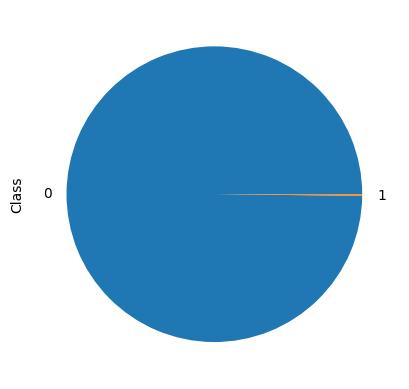

In [10]:
#checking the class distribution in percentage and visualising it through pie-chart
print((credit_card_data.groupby('Class')['Class'].count()/credit_card_data['Class'].count()) * 100)
((credit_card_data.groupby('Class')['Class'].count()/credit_card_data['Class'].count()) * 100).plot.pie()

In [11]:
#separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
#statistical measures of data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:

credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

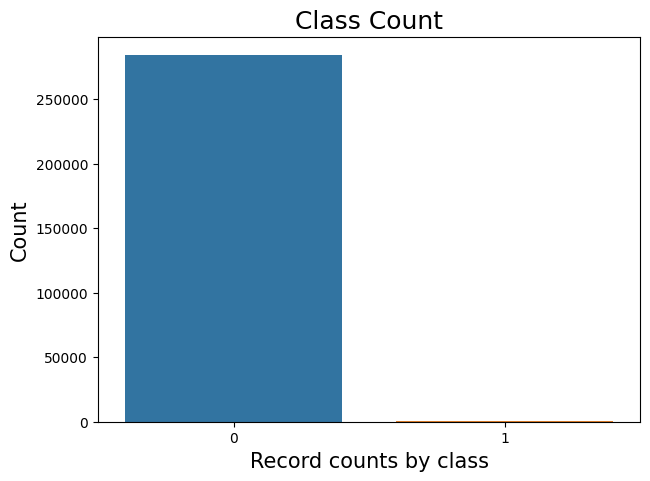

In [16]:
#create a bar plot for number and % of legit vs fraudulent transactions
plt.figure(figsize=(7,5))
sns.countplot(data=credit_card_data, x='Class')
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [17]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


For dealing with unbalanced data, we're going to use the method called **Under-Sampling**

Build a sample dataset containing similar distribution of normal transactions and fraudulent Transactions

Number of Fraudulent transactions --> 492

In [18]:
legit_sample = legit.sample(n=492)

# Concatenating two DataFrames

In [19]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [20]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
159740,112878.0,-0.496533,0.045882,0.290437,-4.075579,0.671000,0.012420,1.099471,-0.239286,1.883420,...,-0.295190,-0.482571,0.065452,-0.147445,-0.565586,-1.603645,-0.129572,-0.066546,60.00,0
264959,161668.0,0.021987,0.807087,0.280693,-0.583463,0.406729,-1.056018,0.967643,-0.157425,0.017864,...,-0.257063,-0.583064,0.089246,-0.031935,-0.517016,0.144756,0.246350,0.096388,5.38,0
120393,75813.0,-1.255744,0.550352,2.033552,0.047796,-0.581885,0.966443,-0.614136,1.128436,0.116841,...,0.098552,0.317270,-0.014613,-0.292542,-0.260209,0.359786,0.231935,0.067669,25.00,0
190571,128888.0,-2.827555,-1.781039,1.697560,4.866334,4.301005,1.536994,-2.282209,0.946685,-1.351291,...,0.034824,0.639264,-0.917921,-0.827553,0.270068,0.810302,0.445198,-0.103519,1.51,0
166162,117903.0,-0.974137,1.071956,1.294005,-0.533401,0.078680,0.839508,-0.882991,-2.317126,-0.311492,...,-1.326477,0.243678,0.212276,0.650909,-0.407126,-0.595119,0.130695,0.173202,2.49,0


In [21]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

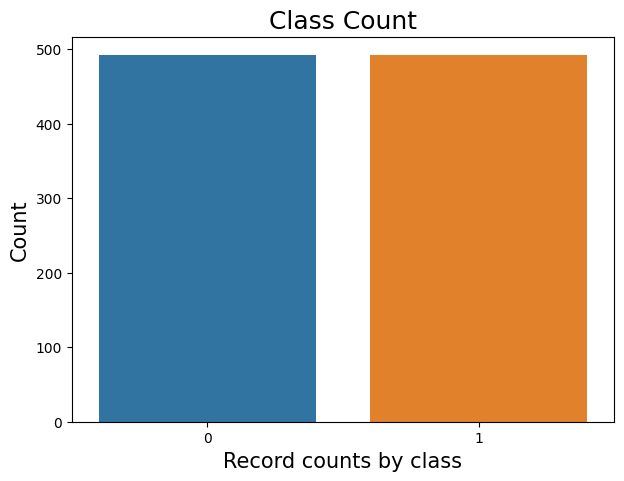

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(data=new_dataset, x='Class')
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [24]:
#checking the correlation
corr = credit_card_data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


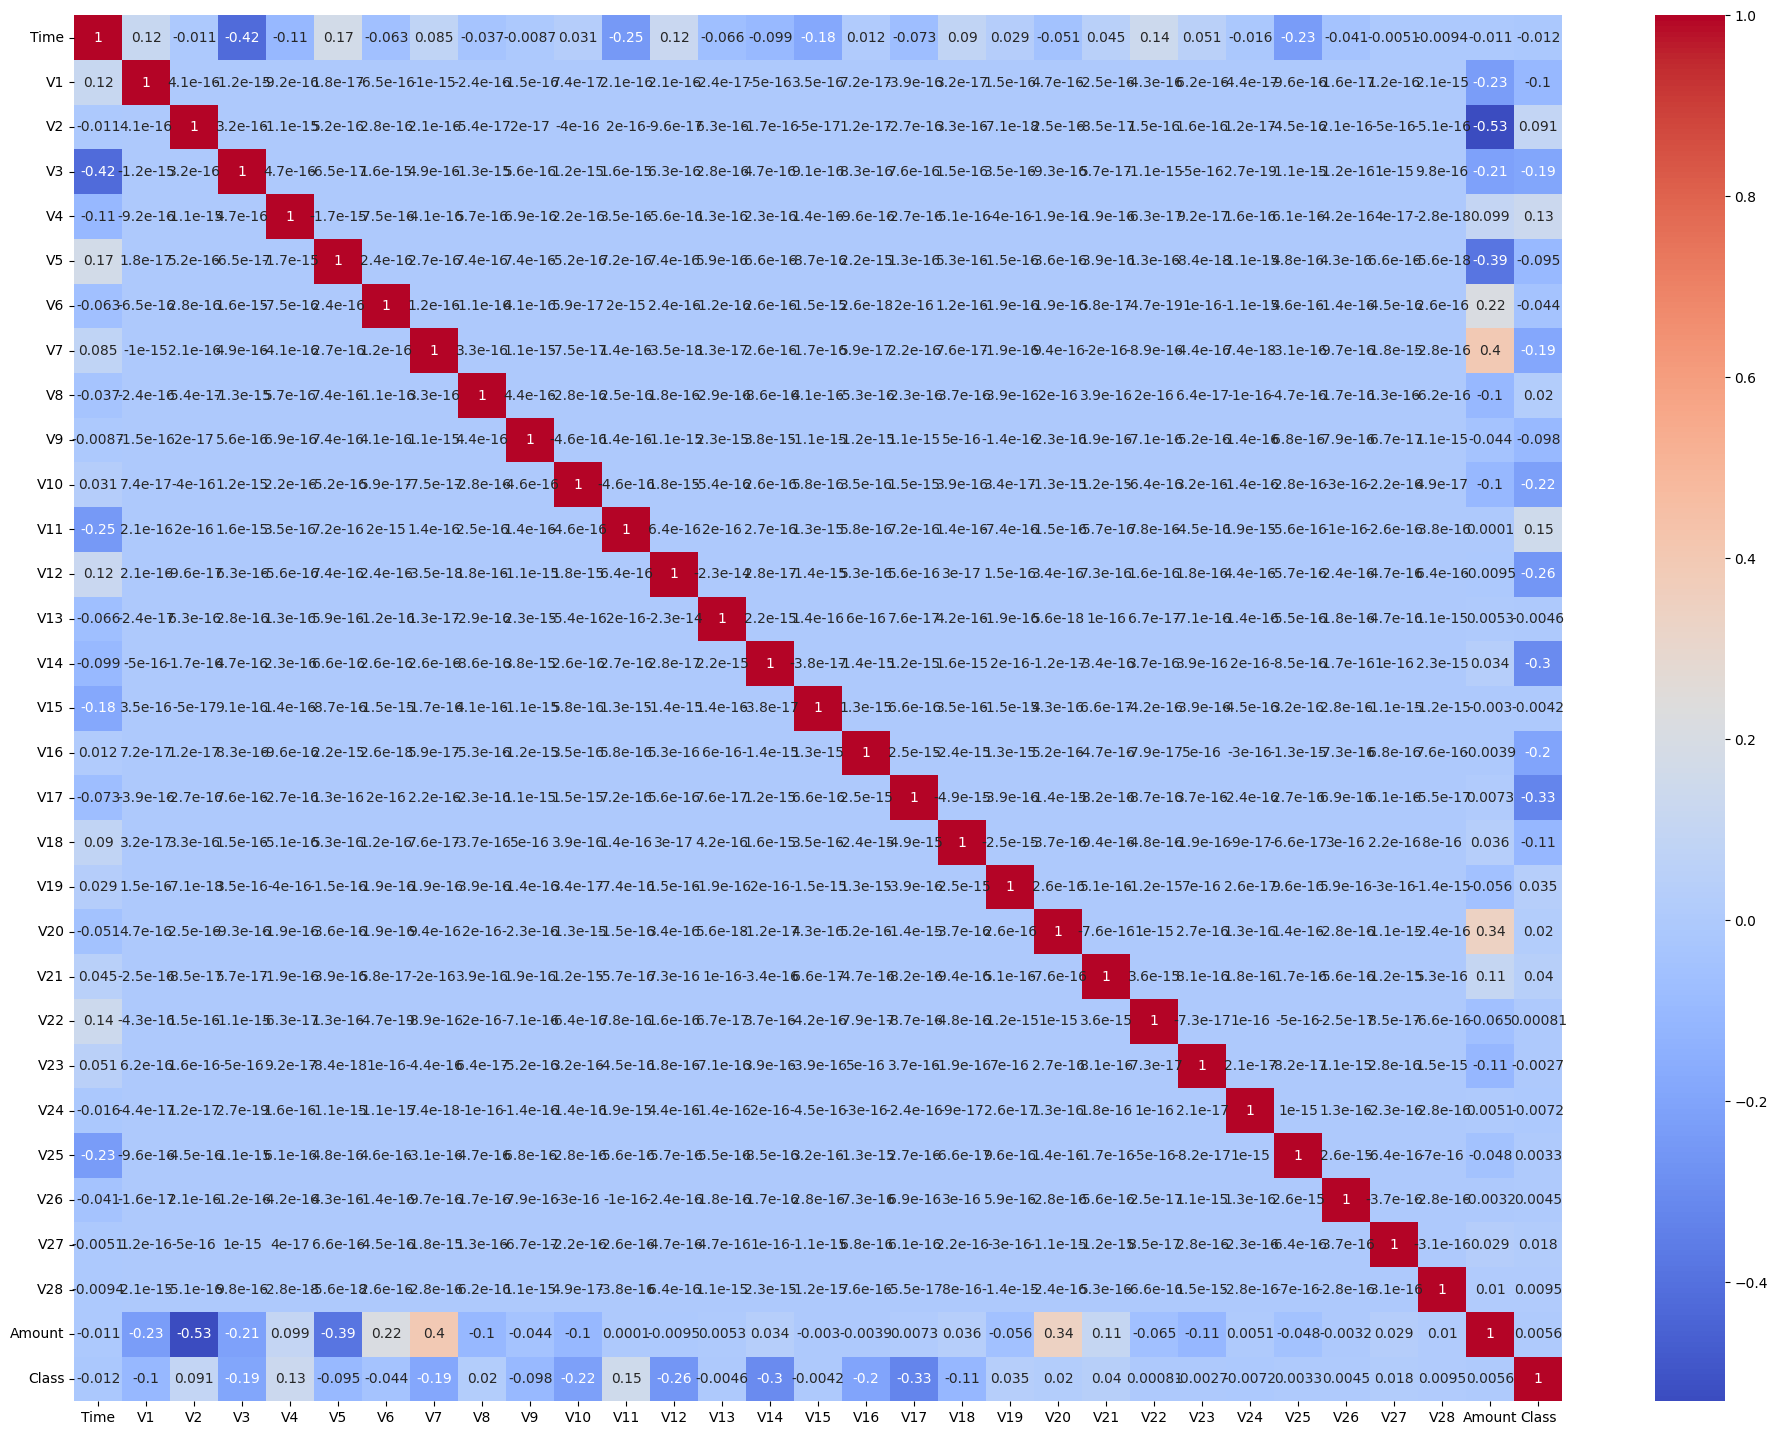

In [25]:
#checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [26]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93793.605691,-0.010159,-0.192560,0.063792,0.022740,-0.032268,0.034475,0.071214,0.001021,-0.008199,...,0.043507,0.010282,-0.048828,0.056019,-0.035008,-0.004900,0.073336,0.018821,0.005632,118.453801
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
159740  112878.0 -0.496533  0.045882  0.290437 -4.075579  0.671000  0.012420   
264959  161668.0  0.021987  0.807087  0.280693 -0.583463  0.406729 -1.056018   
120393   75813.0 -1.255744  0.550352  2.033552  0.047796 -0.581885  0.966443   
190571  128888.0 -2.827555 -1.781039  1.697560  4.866334  4.301005  1.536994   
166162  117903.0 -0.974137  1.071956  1.294005 -0.533401  0.078680  0.839508   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(Y)

159740    0
264959    0
120393    0
190571    0
166162    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the data into Training Data & Testing Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [31]:
#Accumulating all the column names under one variable
cols = list(X.columns.values)

<ipython-input-32-e7ad33693a84>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col][legit_records], color='green')
<ipython-input-32-e7ad33693a84>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col][fraudulent_records], color='red')
<ipython-input-32-e7ad33693a84>:8: UserWarning: 

`dist

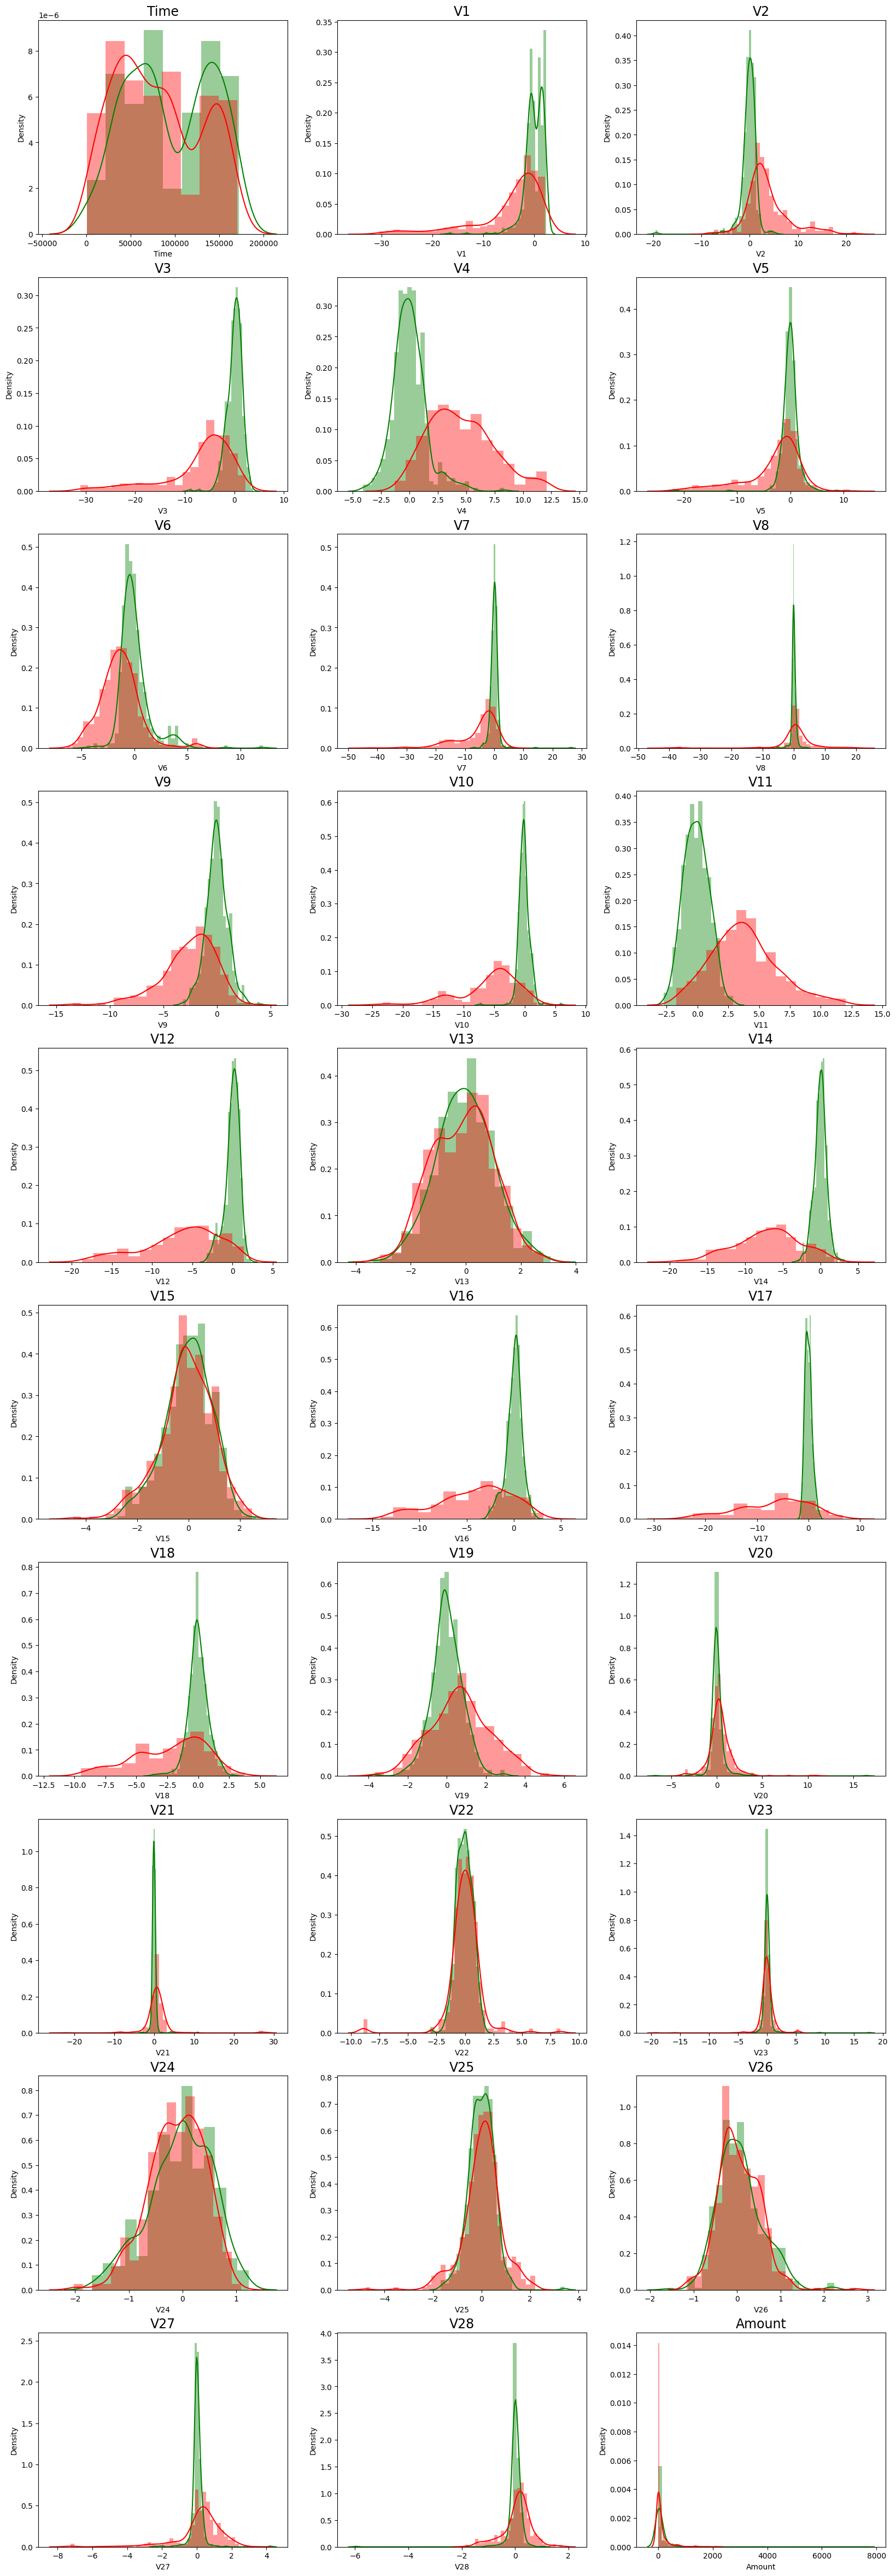

In [32]:
#plot the histogram of a variable from the dataset to see the skewnwss
legit_records = credit_card_data.Class == 0
fraudulent_records = credit_card_data.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10, 3, n+1)
  sns.distplot(X[col][legit_records], color='green')
  sns.distplot(X[col][fraudulent_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# **Model** Training

**Logistic** **Regression** 

In [34]:
model = LogisticRegression()

In [35]:
#training the Logistic Regression Model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

In [37]:
#calculate the training loss
Y_train_prediction = model.predict_proba(X_train)[:,1]
train_loss.append(log_loss(Y_train, Y_train_prediction))

In [38]:
#calculate validation loss
Y_val_prediction = model.predict_proba(X_test)[:,1]
val_loss.append(log_loss(Y_test, Y_val_prediction))

In [39]:
for i in range(10):
    #training the Logistic Regression Model with training data
    model.fit(X_train, Y_train)
    
    # calculate training loss
    y_pred_train = model.predict_proba(X_train)[:,1]
    train_loss.append(log_loss(Y_train, y_pred_train))
    
    # calculate validation loss
    y_pred_val = model.predict_proba(X_test)[:,1]
    val_loss.append(log_loss(Y_test, y_pred_val))
    
    # calculate accuracy on training data
    X_train_prediction = model.predict(X_train)
    train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracy.append(train_data_accuracy)
    
    # calculate accuracy on validation data
    X_val_prediction = model.predict(X_test)
    val_data_accuracy = accuracy_score(X_val_prediction, Y_test)
    val_accuracy.append(val_data_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

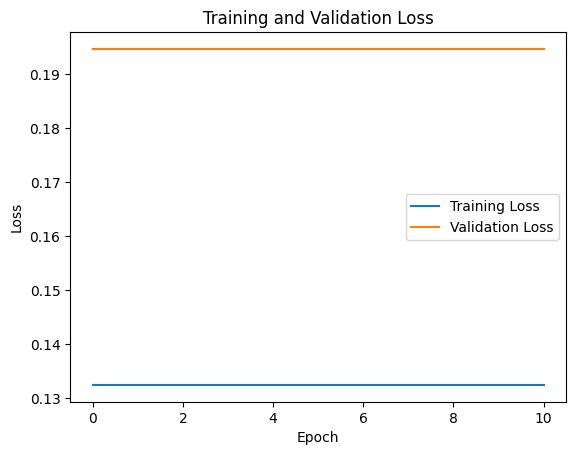

In [40]:
#plot validation and training loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

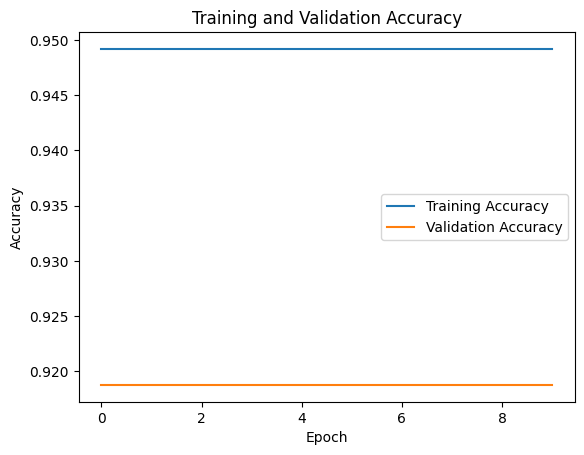

In [41]:
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# **Model** Evaluation

**Accuracy** Score

In [42]:
#Accuracy on Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  0.9491740787801779


In [44]:
#Accuracy on Test Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  0.9187817258883249


# **Confusion Matrix**

In [46]:
conf_mat = confusion_matrix(Y_test, X_test_prediction)


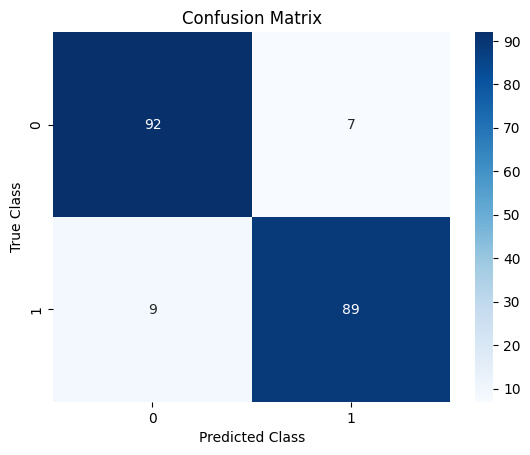

In [47]:
#create heatmap from confusion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Saving the Trained **Model**

In [48]:
import pickle

In [49]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename, 'wb'))

In [50]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

# **SVC** **Model**

In [51]:
from sklearn import svm
svm=svm.SVC()

In [52]:
svm.fit(X_train.values,Y_train)

SVC()

In [53]:
y_pred2 = svm.predict(X_train.values)

In [54]:
accuracy_score(Y_train,y_pred2)

0.5667090216010165

In [55]:
y_pred2=svm.predict(X_test.values)

In [56]:
ac2=accuracy_score(Y_test,y_pred2)

# **K** **NEAREST** **NEIGHBOUR** **CLASSIFIER**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier()
Knn_model.fit(X_train.values,Y_train)
y_pred3 = Knn_model.predict(X_train.values)
accuracy_score(Y_train,y_pred3)


0.7662007623888183

In [58]:
y_pred3 = Knn_model.predict(X_test.values)
ac3 = accuracy_score(Y_test,y_pred3)

In [59]:
score=[]
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train.values,Y_train)
  y_pred=knn.predict(X_test.values)
  score.append(accuracy_score(Y_test,y_pred))

In [60]:
score

[0.5989847715736041,
 0.6091370558375635,
 0.6294416243654822,
 0.6294416243654822,
 0.6700507614213198,
 0.6548223350253807,
 0.6598984771573604,
 0.649746192893401,
 0.6446700507614214,
 0.6345177664974619,
 0.6395939086294417,
 0.6192893401015228,
 0.6192893401015228,
 0.6294416243654822,
 0.6345177664974619,
 0.649746192893401,
 0.6345177664974619,
 0.649746192893401,
 0.6345177664974619,
 0.6294416243654822,
 0.6294416243654822,
 0.6294416243654822,
 0.6142131979695431,
 0.6142131979695431,
 0.6142131979695431,
 0.6243654822335025,
 0.6091370558375635,
 0.6142131979695431,
 0.6192893401015228,
 0.6040609137055838,
 0.5939086294416244,
 0.5736040609137056,
 0.5786802030456852,
 0.5736040609137056,
 0.5939086294416244,
 0.5989847715736041,
 0.5888324873096447,
 0.5989847715736041,
 0.6040609137055838]

# **DECISIION TREE**

In [61]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier()
DT_model.fit(X_train.values, Y_train)

y_pred4a=DT_model.predict(X_train.values)
training_data_accuracy=accuracy_score(y_pred4a,Y_train)


y_pred4b=DT_model.predict(X_test.values)
ac4= accuracy_score(y_pred4b,Y_test)

In [62]:
ac4

0.9238578680203046

# **RANDOM** **FOREST**

In [63]:
from sklearn.ensemble import RandomForestClassifier

RF_model= RandomForestClassifier()
RF_model.fit(X_train.values, Y_train)

Y_pred5a= RF_model.predict(X_train.values)
training_data_accuracy=accuracy_score(Y_train,Y_pred5a)

Y_pred5b= RF_model.predict(X_test.values)
ac5= accuracy_score(Y_test,Y_pred5b)

In [64]:
ac5

0.9289340101522843

# FINAL **DATA**

In [65]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],'Accuracy':[training_data_accuracy,ac2,ac3,ac4,ac5]})

In [66]:
final_data

,Models,Accuracy
0,LR,1.000000
1,SVM,0.517766
2,KNN,0.670051
3,DT,0.923858
4,RF,0.928934


<Axes: xlabel='Models', ylabel='Accuracy'>

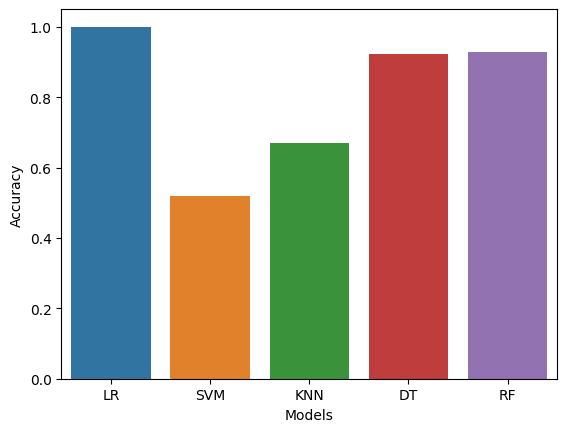

In [67]:
import seaborn as sns
sns.barplot(x='Models',y='Accuracy',data=final_data)